# Gradient Descent: Linear Regression (ipywidgets)
Adjust the controls to see how the **learning algorithm** (gradient descent) searches the **hypothesis class** (lines) by minimizing the **loss** (MSE) and produces an **estimator**.

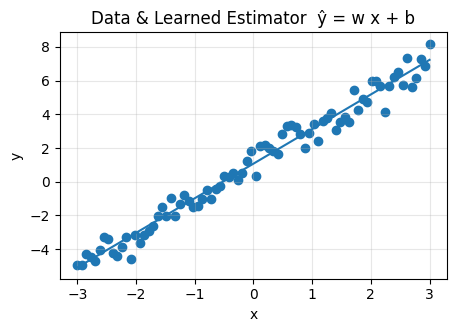

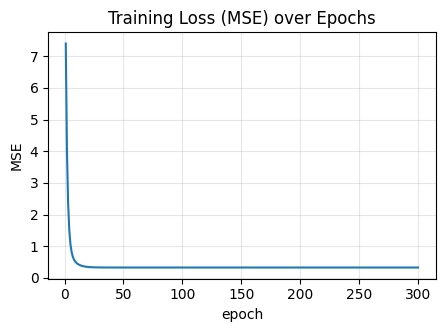

Final parameters: w = 2.0536, b = 1.0722
Final MSE: 0.325443 (batch size: full)


Output()

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import FloatLogSlider, IntSlider, Dropdown, VBox, HBox, Layout, interactive_output
from IPython.display import display

def make_data(n=60, w_true=2.0, b_true=1.0, noise=0.8, seed=0):
    rng = np.random.default_rng(seed)
    x = np.linspace(-3, 3, n)
    y = w_true * x + b_true + rng.normal(0, noise, size=n)
    return x, y

def train_linear_gd(x, y, lr=0.05, epochs=200, batch_size=None, seed=0):
    rng = np.random.default_rng(seed)
    w, b = rng.normal(0, 0.1), 0.0
    n = len(x)
    history = []
    for ep in range(epochs):
        if batch_size is None or batch_size >= n:
            idx = np.arange(n)
        else:
            idx = rng.choice(n, size=batch_size, replace=False)
        xb, yb = x[idx], y[idx]
        yhat = w * xb + b
        grad_w = (2/len(xb)) * np.sum((yhat - yb) * xb)
        grad_b = (2/len(xb)) * np.sum(yhat - yb)
        w -= lr * grad_w
        b -= lr * grad_b
        loss = np.mean((w * x + b - y)**2)
        history.append(loss)
    return w, b, np.array(history)

lr = FloatLogSlider(description='learning rate', base=10, min=-4, max=0, step=0.1, value=0.05, layout=Layout(width='400px'))
epochs = IntSlider(description='epochs', min=10, max=2000, step=10, value=300, layout=Layout(width='400px'))
batch = Dropdown(description='batch size', options=[('Full batch', None), 8, 16, 32, 64], value=None, layout=Layout(width='300px'))
noise = FloatLogSlider(description='noise σ', base=10, min=-2, max=0.7, step=0.1, value=0.6, layout=Layout(width='400px'))
seed = IntSlider(description='seed', min=0, max=999, step=1, value=0, layout=Layout(width='300px'))
npoints = IntSlider(description='# points', min=20, max=200, step=5, value=80, layout=Layout(width='300px'))

controls = VBox([HBox([lr, epochs]), HBox([batch, noise]), HBox([seed, npoints])])
out = {}

def update(lr, epochs, batch, noise, seed, npoints):
    x, y = make_data(n=npoints, noise=noise, seed=seed)
    w, b, hist = train_linear_gd(x, y, lr=lr, epochs=epochs, batch_size=batch, seed=seed)
    plt.figure(figsize=(5,3.2))
    plt.scatter(x, y)
    xgrid = np.linspace(np.min(x), np.max(x), 200)
    plt.plot(xgrid, w * xgrid + b)
    plt.title('Data & Learned Estimator  ŷ = w x + b')
    plt.xlabel('x'); plt.ylabel('y')
    plt.grid(True, alpha=0.3)
    plt.show()
    plt.figure(figsize=(5,3.2))
    plt.plot(np.arange(1, len(hist)+1), hist)
    plt.title('Training Loss (MSE) over Epochs')
    plt.xlabel('epoch'); plt.ylabel('MSE')
    plt.grid(True, alpha=0.3)
    plt.show()
    print(f'Final parameters: w = {w:.4f}, b = {b:.4f}')
    print(f'Final MSE: {hist[-1]:.6f} (batch size: {'full' if batch is None else 'mini-' + str(batch)})')

display(controls)
display(interactive_output(update, {'lr': lr, 'epochs': epochs, 'batch': batch, 'noise': noise, 'seed': seed, 'npoints': npoints}))
